# $Model$

## Using the titanic data:



### imports

In [1]:
# General DS Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import acquire
import prepare

np.random.seed(9)

In [2]:
# Decision Tree and Model Evaluation Imports
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

### Acquire

In [ ]:
titanic_df =acquire.new_titanic_data()

### Prepare

In [ ]:
titanic_df=prepare.prep_titanic(titanic_df)

In [ ]:
titanic_df.head()

In [ ]:
titanic_processing_df = titanic_df.drop(columns={'sex','class', 'embark_town'})

In [ ]:
titanic_processing_df.head()

In [ ]:
titanic_processing_df.columns

In [ ]:
# Splitting dataset into X and y components before doing the train/validate/test split
X = titanic_processing_df[['age', 'sibsp', 'parch', 'fare', 'alone', 'sex_male',
       'class_Second', 'class_Third', 'embark_town_Queenstown',
       'embark_town_Southampton']]

y = titanic_processing_df.survived

X_train_and_validate, X_test, y_train_and_validate, y_test = train_test_split(X, y, random_state=123, test_size=.2)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_and_validate, y_train_and_validate, random_state=123, test_size=.3)

In [ ]:
X_train.shape, X_validate.shape,X_test.shape

In [ ]:
X_train, X_validate, X_test = prepare.impute_mean_age(X_train, X_validate, X_test)


In [ ]:
X_train.head()

In [ ]:
y_train.head()

### 1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [ ]:
# set target variable survived baseline
baseline = y_train.mode()
baseline

In [ ]:
X_train['baseline_prediction'] = int(baseline)
X_train

In [ ]:
actual = y_train
predictions = X_train.baseline_prediction

In [ ]:
pd.crosstab(actual, predictions)

In [ ]:
print('baseline accuracy :',(298)/(200+298))

In [ ]:
X_train = X_train.drop(columns = ['baseline_prediction'])


In [ ]:
X_train.info()

### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)


In [ ]:
# Create the decision tree object and specify hyperparams
tree_1 = DecisionTreeClassifier(max_depth = 5,min_samples_split = 5)

In [ ]:
tree_1.fit(X_train, y_train)

# Rudimentary visualization of model structure
print(export_text(tree_1, feature_names=X_train.columns.tolist()))

In [ ]:
# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = tree_1.predict(X_train)

In [ ]:
# Visualize the tree
plt.figure(figsize=(12, 7))
plot_tree(tree_1, feature_names=X_train.columns, class_names=['0','1'])
plt.show()

### 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.


In [ ]:
predictions = tree_1.predict(X_train)
actual = y_train

In [ ]:
pd.crosstab(actual, predictions)

In [ ]:
print(classification_report(actual, predictions))

### 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.


In [ ]:
TN, FP, FN, TP = confusion_matrix(y_train, y_predictions).ravel()
TN, FP, FN, TP 

In [ ]:
# create crosstab from tree_1 model after train
pd.crosstab(actual, predictions)

In [ ]:
# look at accuracy of tree_1 Model
print(classification_report(actual, predictions))

### Accuracy is 0.84 for tree_1 Model

### 5.Run through steps 2-4 using a different max_depth value.


In [ ]:
# Create the decision tree object and specify hyperparams
tree_2 = DecisionTreeClassifier(max_depth = 7,min_samples_split = 13)

In [ ]:
tree_2.fit(X_train, y_train)

# Rudimentary visualization of model structure
print(export_text(tree_2, feature_names=X_train.columns.tolist()))

In [ ]:
# model predictions using tree
tree_2.predict(X_train)

In [ ]:
predictions = tree_2.predict(X_train)
actual = y_train

In [ ]:
# create crosstab from tree_1 model after train
pd.crosstab(actual, predictions)

In [ ]:
# look at accuracy of tree_2 Model
print(classification_report(actual, predictions))

### Accuracy for tree_2 Model is 0.88

### 6. Which model performs better on your in-sample data?


Tree_2 Model performed slightly better by 4%.


### 7. Which model performs best on your out-of-sample data, the validate set?

In [ ]:
predictions = tree_1.predict(X_validate)
actual = y_validate

print(classification_report(actual, predictions))

In [ ]:
predictions = tree_2.predict(X_validate)
actual = y_validate

print(classification_report(actual, predictions))

### In terms of accuracy tree_1 Model performed better by 5%.

# Test Data

In [ ]:
predictions = tree_1.predict(X_test)
actual = y_test

print(classification_report(actual, predictions))

### Tree_1 Model had an 87% accuracy in test data

# Work through these same exercises using the Telco dataset.
## Experiment with this model on other datasets with a higher number of output classes.

### Acquire

In [ ]:
telco_df =acquire.new_telco_data()

In [ ]:
telco_df=prepare.prep_telco(telco_df)

In [ ]:
telco_df.head()

In [ ]:
telco_df.columns

In [ ]:
telco_process = telco_df.drop(columns={'customer_id','gender','partner',
                                    'dependents',
                                    'phone_service',
                                    'multiple_lines',
                                    'online_security',
                                    'online_backup',
                                    'device_protection', 
                                    'tech_support',
                                    'streaming_tv',
                                    'streaming_movies',
                                    'paperless_billing',  
                                    'contract_type',
                                    'internet_service_type',
                                    'payment_type',
                                      'churn',
                                       'churn_No'})

In [ ]:
telco_process.columns.to_list()

In [ ]:
# drop customer_id,gender,  
telco_process.dtypes 

In [ ]:
telco_process.shape

In [ ]:
# Splitting dataset into X and y components before doing the train/validate/test split
X = telco_process[['senior_citizen',
 'tenure',
 'monthly_charges',
 'total_charges',
 'gender_Female',
 'gender_Male',
 'partner_No',
 'partner_Yes',
 'dependents_No',
 'dependents_Yes',
 'phone_service_No',
 'phone_service_Yes',
 'multiple_lines_No',
 'multiple_lines_No phone service',
 'multiple_lines_Yes',
 'online_security_No',
 'online_security_No internet service',
 'online_security_Yes',
 'online_backup_No',
 'online_backup_No internet service',
 'online_backup_Yes',
 'device_protection_No',
 'device_protection_No internet service',
 'device_protection_Yes',
 'tech_support_No',
 'tech_support_No internet service',
 'tech_support_Yes',
 'streaming_tv_No',
 'streaming_tv_No internet service',
 'streaming_tv_Yes',
 'streaming_movies_No',
 'streaming_movies_No internet service',
 'streaming_movies_Yes',
 'paperless_billing_No',
 'paperless_billing_Yes',
 'contract_type_Month-to-month',
 'contract_type_One year',
 'contract_type_Two year',
 'internet_service_type_DSL',
 'internet_service_type_Fiber optic',
 'internet_service_type_None',
 'payment_type_Bank transfer (automatic)',
 'payment_type_Credit card (automatic)',
 'payment_type_Electronic check',
 'payment_type_Mailed check']]

y = telco_process.churn_Yes

X_train_and_validate, X_test, y_train_and_validate, y_test = train_test_split(X, y, random_state=123, test_size=.2)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_and_validate, y_train_and_validate, random_state=123, test_size=.3)

In [ ]:
X_train, X_validate, X_test = prepare.impute_mean_total_charges(X_train, X_validate, X_test)

In [ ]:
X_train.shape, X_validate.shape,X_test.shape

In [ ]:
X_train.info()

In [ ]:
X_train.head(), y_train.head()

### 1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [ ]:
# 0 is the largest value count which represents customers who have not churn
y_train.value_counts()[0]

In [ ]:
baseline = y_train.value_counts()[0]/(y_train.value_counts()[0]+y_train.value_counts()[1])
print('baseline accuracy:',baseline)

### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [ ]:
# Create the decision tree object and specify hyperparams
tree_1 = DecisionTreeClassifier(max_depth = 3,min_samples_split = 5)

tree_1.fit(X_train, y_train)

# Rudimentary visualization of model structure
print(export_text(tree_1, feature_names=X_train.columns.tolist()))

In [ ]:
# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = tree_1.predict(X_train)

In [ ]:
# Visualize the tree
plt.figure(figsize=(20, 20))
plot_tree(tree_1, feature_names=X_train.columns, class_names=['0','1'])
plt.show()

### 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [ ]:
print('Accuracy of tree_1:',tree_1.score(X_train, y_train))

In [ ]:
# plot_confusion_matrix(tree_1, X_train, y_train, cmap='Purples')

In [ ]:
print(classification_report(y_train, y_predictions))

In [ ]:
# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_predictions, output_dict=True)
print("Tree of max_depth = 3,min_samples_split = 5")
pd.DataFrame(report)

### 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

Create a confusion matrix

* True Positive: number of occurrences where y is true and y is predicted true.
* True Negative: number of occurrences where y is false and y is predicted false.
* False Positive: number of occurrences where y is false and y is predicted true.
* False Negative: number of occurrences where y is true and y is predicted false.

In [ ]:
TN, FP, FN, TP = confusion_matrix(y_train, y_predictions).ravel()
print(f'True Negative: {TN}')
print(f'False Positive: {FP}')
print(f'False Negative:  {FN}')
print(f'True Positive: {TP}')


In [ ]:
 confusion_matrix(y_train, y_predictions)

In [ ]:
negative_cases = TN + FP
positive_cases = FN + TP
print(f"Negative Cases: {negative_cases}")
print(f"Positive Cases: {positive_cases}")
print(y_train.value_counts())

### churn_Yes (1) is the positive case

In [ ]:
# look at classification report of tree_1 Model
print(classification_report(actual, predictions))

In [ ]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL

true_positive_rate = sensitivity = recall = power = TP/(TP+FN)

false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)

true_negative_rate = specificity = selectivity = TN/(TN+FP)

false_negative_rate = miss_rate = FN/(FN+TP)

precision = PPV = TP/(TP+FP)

f1_score = 2*(precision*recall)/(precision+recall)

support_pos = TP + FN

support_neg = FP + TN



In [ ]:
print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

### 5. Run through steps 2-4 using a different max_depth value.

In [ ]:
# Let's get loopy
for i in range(1, 21):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i,min_samples_split = 5, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = tree.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

In [ ]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []

for i in range(1, 25):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o', label = 'Train')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o', label = 'Validate')


#plt.plot(df_2.max_depth, df_2.validate_accuracy, marker = 'x', label = 'Validate')

plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []

for i in range(1, 25):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i,min_samples_leaf= 11, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df_2 = pd.DataFrame(metrics)
df_2["difference"] = df_2.train_accuracy - df_2.validate_accuracy
df_2

# $ Random Forest$

Use titanic data:

In [ ]:
titanic_df = acquire.get_titanic_data()
titanic_df

In [ ]:
titanic_prep = prepare.prep_titanic(titanic_df)

In [ ]:
titanic_prep.head()

In [ ]:
titanic_prep.dtypes

In [ ]:
titanic_prep = titanic_prep.drop(columns = {'sex', 'class','embark_town'})

In [ ]:
titanic_prep.info()

help(prepare.train_validate_test(titanic_df,'survived'))

In [ ]:
def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [ ]:
# split into train, validate, test
train, validate, test = train_validate_test_split(titanic_prep, target='survived', seed=123)

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [ ]:
# take care of null values in age variable
X_train, X_validate, X_test = prepare.impute_mean_age(X_train, X_validate, X_test)

In [ ]:
X_train.sample(10)

In [ ]:
pd.DataFrame(y_train).sample(10)

In [ ]:
pd.DataFrame(y_train.value_counts())

In [ ]:
baseline = y_train.mode()
baseline

*** Baseline is set to 0 which represents not survived ***

In [ ]:
X_train['baseline_prediction'] = int(baseline)


In [ ]:
actual = y_train
predictions = X_train.baseline_prediction

In [ ]:
pd.crosstab(actual, predictions)

In [ ]:
X_train = X_train.drop(columns = ['baseline_prediction'])

In [ ]:
X_train.columns

### 1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [ ]:
random_forest = RandomForestClassifier(max_depth=10, min_samples_leaf = 1 , random_state=123)

In [ ]:
random_forest.fit(X_train, y_train)

In [ ]:
print(random_forest.feature_importances_)

In [ ]:

plt.figure(figsize=(20, 8))
plt.bar(X_train.columns, random_forest.feature_importances_)

plt.show()


* The higher number the feature importance == more important the feature.
* The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature.

In [ ]:
y_pred = random_forest.predict(X_train)
y_pred

In [ ]:
# this is the match of the values to the votes
random_forest.classes_
# [0] not survived, [1] survived

In [ ]:
y_pred_proba = random_forest.predict_proba(X_train)
y_pred_proba

### 2. Evaluate your results using the model score, confusion matrix, and classification report.

Evaluate model using **model score**

In [ ]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(random_forest.score(X_train, y_train)))

Evaluate model using **confusion matrix**

In [ ]:
cm = confusion_matrix(y_train, y_pred)
print(cm)

In [ ]:
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=random_forest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random_forest.classes_)
disp = disp.plot(cmap=plt.cm.Blues,values_format='g')

disp.plot()


Evaluate using **classification report**

In [ ]:
print(classification_report(y_train, y_pred))

### 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true nega

In [ ]:
TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()
print(f'True Negative: {TN}')
print(f'False Positive: {FP}')
print(f'False Negative:  {FN}')
print(f'True Positive: {TP}')

In [ ]:
 confusion_matrix(y_train, y_pred)

In [ ]:
negative_cases = TN + FP
positive_cases = FN + TP
print(f"Negative Cases: {negative_cases}")
print(f"Positive Cases: {positive_cases}")
print(y_train.value_counts())

In [ ]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL

true_positive_rate = sensitivity = recall = power = TP/(TP+FN)

false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)

true_negative_rate = specificity = selectivity = TN/(TN+FP)

false_negative_rate = miss_rate = FN/(FN+TP)

precision = PPV = TP/(TP+FP)

f1_score = 2*(precision*recall)/(precision+recall)

support_pos = TP + FN

support_neg = FP + TN

In [ ]:
print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

### 4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.

In [ ]:
y_train.copy = y_train

In [ ]:
y_train.copy

In [ ]:
# Let's get loopy

for i in range(1, 21):
  
    # Make the model
    random_forest = RandomForestClassifier(max_depth=10, min_samples_leaf = i , random_state=123)

    # Fit the model (on train and only train)
    random_forest = random_forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_pred = random_forest.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_pred, output_dict=True)
    print(f"Tree with min sample leaf {i}")
    print(pd.DataFrame(report))
    print()
 

In [ ]:
for h in range(10,0,-1):
    print(f'max depth {h}')
    for i in range(1, 21):
  
    # Make the model
        random_forest = RandomForestClassifier(max_depth=h, min_samples_leaf = i , random_state=123)

    # Fit the model (on train and only train)
        random_forest = random_forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
        y_pred = random_forest.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
        report = classification_report(y_train, y_pred, output_dict=True)
        print(f"Tree with min sample leaf {i}")
        print(f'max depth {h}')
        print(pd.DataFrame(report))
        print()
 

In [ ]:
metrics=[]
for h in range(10,0,-1):
   
    print(f'max depth {h}')
    
    for i in range(1, 21):
  
    # Make the model
        random_forest = RandomForestClassifier(max_depth=h, min_samples_leaf = i , random_state=123)
    
    # Fit the model (on train and only train)
        random_forest.fit(X_train, y_train)
        
         # Use the model
    # We'll evaluate the model's performance on train, first
        in_sample_accuracy = random_forest.score(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
        y_pred = random_forest.predict(X_train)
        
        output = {
        "max_depth": h,
        "min_samples_leaf": i,
        "train_accuracy": in_sample_accuracy,
        #"validate_accuracy": y_pred
    }

        metrics.append(output)
        
        df = pd.DataFrame(metrics)
df
  
 


### 5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [ ]:
# differences in the train_accuracy
df

In [ ]:
df[df.train_accuracy.sort_values(ascending = False)==df.train_accuracy.max()]

max_depth of 10 with a min_sample leaf of 1 was the best model in train accuracy with 96% accuracy

# After making a few models, which one has the best performance (or closest metrics) on both train and validate?

## Validate

In [ ]:
# Make the model
random_forest = RandomForestClassifier(max_depth=9, min_samples_leaf = 1 , random_state=123)
    
    # Fit the model (on train and only train)
random_forest.fit(X_train, y_train)
        
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(random_forest.score(X_validate, y_validate)))

In [ ]:
# Make the model
random_forest = RandomForestClassifier(max_depth=10, min_samples_leaf = 1 , random_state=123)
    
    # Fit the model (on train and only train)
random_forest.fit(X_train, y_train)
        
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(random_forest.score(X_validate, y_validate)))

In [ ]:
metrics=[]
for h in range(10,0,-1):
   
    print(f'max depth {h}')
    
    for i in range(1, 21):
  
    # Make the model
        random_forest = RandomForestClassifier(max_depth=h, min_samples_leaf = i , random_state=123)
    
    # Fit the model (on train and only train)
        random_forest = random_forest.fit(X_train, y_train)
        
         # Use the model
    # We'll evaluate the model's performance on train, first
        in_sample_accuracy = random_forest.score(X_train, y_train)
        
    
        out_of_sample_accuracy = random_forest.score(X_validate, y_validate)


    # Use the model
    # We'll evaluate the model's performance on train, first
        y_pred = random_forest.predict(X_train)
        
        output = {
        "max_depth": h,
        "min_samples_leaf": i,
        "train_accuracy": in_sample_accuracy,
         "validate_accuracy": out_of_sample_accuracy   
      
    }

        metrics.append(output)
        
        df_2 = pd.DataFrame(metrics)



        df_2["difference"] = df_2.train_accuracy - df_2.validate_accuracy
df_2

In [ ]:
df_2[df_2.difference.sort_values(ascending = False)==df_2.difference.max()]

# $KNN$
Use titanic data:

In [ ]:
def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [ ]:
# acqurire titanic data
titanic_df = acquire.get_titanic_data()


# prep titanic
titanic_prep = prepare.prep_titanic(titanic_df)

# drop columns 'sex''class''embark_town'
titanic_prep = titanic_prep.drop(columns = {'sex', 'class','embark_town'})

# split into train, validate, test
train, validate, test = train_validate_test_split(titanic_prep, target='survived', seed=123)

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

# take care of null values in age variable
X_train, X_validate, X_test = prepare.impute_mean_age(X_train, X_validate, X_test)

In [ ]:
# look into what would a baseline would look like
y_train.sum(), len(y_train), y_train.value_counts()

### 1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)


In [ ]:
knn1 = KNeighborsClassifier()

In [ ]:
knn1.fit(X_train, y_train)

In [ ]:
y_pred = knn1.predict(X_train)
y_pred[:10]

In [ ]:
# Actual data
pd.DataFrame(y_train[:10]).T

In [ ]:
# gives the probability of beign any given class
y_pred_proba = knn1.predict_proba(X_train)
y_pred_proba[:5]

### 2.. Evaluate your results using the model score, confusion matrix, and classification report.

In [ ]:
# Model score
print('Accuracy of KNN 1 classifier on training set: {:.2f}'
     .format(knn1.score(X_train, y_train)))

In [ ]:
# confusion matrix
print(confusion_matrix(y_train, y_pred))

In [ ]:
# 0= not survived, 1= survived
pd.crosstab(y_train, y_pred)

In [ ]:
# Classification Report 0 = not survived, 1= survived
print(classification_report(y_train, y_pred))

### 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.


In [ ]:
# use confusion matrix to set: tn, fp, fn, fp 
tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()


In [ ]:

print("True Positives", tp)
print("False Positives", fp)
print("False Negatives", fn)
print("True Negatives", tn)

print("-------------")

accuracy = (tp + tn) / (tp + tn + fp + fn)

precision = tp / (tp + fp)

recall = tp / (tp + fn)


f1_score = 2*(precision*recall)/(precision+recall)

print("Accuracy is", accuracy)
print("Recall is", round(recall,2))
print("Precision is", round(precision,2))

print(f"F1 Score: {f1_score}")

### 4. Run through steps 2-4 setting k to 10

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors=10, weights='uniform')
knn2.fit(X_train, y_train)
y_pred = knn2.predict(X_train)
print('Accuracy of KNN2 classifier on training set: {:.2f}'
     .format(knn2.score(X_train, y_train)))
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

In [ ]:
# use confusion matrix to set: tn, fp, fn, fp 
tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()


In [ ]:
print("True Positives", tp)
print("False Positives", fp)
print("False Negatives", fn)
print("True Negatives", tn)

print("-------------")

accuracy = (tp + tn) / (tp + tn + fp + fn)

precision = tp / (tp + fp)

recall = tp / (tp + fn)


f1_score = 2*(precision*recall)/(precision+recall)

print("Accuracy is", accuracy)
print("Recall is", round(recall,2))
print("Precision is", round(precision,2))

print(f"F1 Score: {f1_score}")

### 5. Run through steps 2-4 setting k to 20

In [ ]:
knn3 = KNeighborsClassifier(n_neighbors=20, weights='uniform')
knn3.fit(X_train, y_train)
y_pred = knn3.predict(X_train)
print('Accuracy of KNN 3 classifier on training set: {:.2f}'
     .format(knn3.score(X_train, y_train)))
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

In [ ]:
# use confusion matrix to set: tn, fp, fn, fp 
tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()


In [ ]:
print("True Positives", tp)
print("False Positives", fp)
print("False Negatives", fn)
print("True Negatives", tn)

print("-------------")

accuracy = (tp + tn) / (tp + tn + fp + fn)

precision = tp / (tp + fp)

recall = tp / (tp + fn)


f1_score = 2*(precision*recall)/(precision+recall)

print("Accuracy is", accuracy)
print("Recall is", round(recall,2))
print("Precision is", round(precision,2))

print(f"F1 Score: {f1_score}")

### 6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?


Model 1 accuracy is .79, Model 2 accuracy is 0.74 and Model 3 accuracy is 0.72.

The first model with K5 neighbors performed better by far. I suppose it is because accuracy increases by proximity.

### 7. Which model performs best on our out-of-sample data from validate?

In [ ]:

print('Accuracy of KNN 1 classifier on training set: {:.2f}'
     .format(knn1.score(X_validate, y_validate)))


In [ ]:

print('Accuracy of KNN2 classifier on training set: {:.2f}'
     .format(knn2.score(X_validate, y_validate)))


In [ ]:

print('Accuracy of KNN3 classifier on validate set: {:.2f}'
     .format(knn3.score(X_validate, y_validate)))


Model KNN3 and Mode; KNN2 are about the same. Model KNN1 did better by on percentage point.

In [ ]:
import matplotlib.pyplot as plt
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()

In [ ]:
# K = 8 would give the highest score.
scores = pd.DataFrame(scores)
scores[scores == scores.max()]

# Use Telco Data

In [3]:
# to see all columns in wide datasets
pd.set_option('display.max_columns', None)

In [21]:
# acquire data using 
df = acquire.get_telco_data()
# prepare data
telco_df = prepare.prep_telco(df)

# drop columns
telco_df =telco_df.drop(columns={'customer_id',
                                    'dependents',
                                    'phone_service',
                                    'multiple_lines',
                                    'online_security',
                                    'online_backup',
                                    'device_protection', 
                                    'tech_support',
                                    'streaming_tv',
                                    'streaming_movies',
                                    'paperless_billing',
                                     'gender',
                                     'partner',
            
                                    'contract_type',
                                    'internet_service_type',
                                    'payment_type'})
# split data
telco_train, validate, test = prepare.split_telco_data(telco_df)
telco_train.shape,validate.shape, test.shape

#seperate target
X_train = telco_train.drop(columns=['churn','churn_No','churn_Yes'])
y_train = telco_train.churn_Yes

X_validate = validate.drop(columns=['churn','churn_No','churn_Yes'])
y_validate = validate.churn_Yes

X_test = test.drop(columns=['churn','churn_No','churn_Yes'])
y_test = test.churn_Yes

X_train, X_validate, X_test = prepare.impute_mean_total_charges(X_train, X_validate, X_test)

In [25]:
X_train.sample(10)

,senior_citizen,tenure,monthly_charges,total_charges,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phone_service_No,phone_service_Yes,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes,online_security_No,online_security_No internet service,online_security_Yes,online_backup_No,online_backup_No internet service,online_backup_Yes,device_protection_No,device_protection_No internet service,device_protection_Yes,tech_support_No,tech_support_No internet service,tech_support_Yes,streaming_tv_No,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_No,paperless_billing_Yes,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5982,0,61,20.55,1305.95,0,1,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0
5759,0,48,111.80,5443.65,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0
707,0,71,113.15,7993.30,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0
3900,0,22,93.20,2157.30,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,1
4648,0,71,49.35,3515.25,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0
4261,0,26,80.50,2088.80,0,1,1,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0
6721,0,19,24.70,465.85,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0
4458,0,1,19.95,19.95,0,1,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1
564,0,20,89.40,1871.15,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0
4116,0,57,19.90,1115.60,1,0,0,1,1,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0


In [26]:
y_train

5310    0
3790    0
4398    0
2635    0
2986    0
       ..
6230    1
356     0
2128    1
3586    0
6817    0
Name: churn_Yes, Length: 3943, dtype: uint8

In [36]:
# create first KNN model KNN1, with k=5 and weights set to uniform
knn1 = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn1.fit(X_train, y_train)

#create y_pred to run confusion_matrix
y_pred = knn1.predict(X_train)

# Accuracy score
print('Accuracy of KNN 1 classifier on training set: {:.2f}'
     .format(knn1.score(X_train, y_train)))

# confusion matrix train data vs predicted data
print(confusion_matrix(y_train, y_pred))

# classification report
print(classification_report(y_train, y_pred))

Accuracy of KNN 1 classifier on training set: 0.83
[[2666  231]
 [ 427  619]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      2897
           1       0.73      0.59      0.65      1046

    accuracy                           0.83      3943
   macro avg       0.80      0.76      0.77      3943
weighted avg       0.83      0.83      0.83      3943



In [37]:
# Second model KNN2, with k=5 and weights set to distance
knn2 = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn2.fit(X_train, y_train)

#create y_pred to run confusion_matrix
y_pred2 = knn2.predict(X_train)

# Accuracy score
print('Accuracy of KNN 2 classifier on training set: {:.2f}'
     .format(knn2.score(X_train, y_train)))

# confusion matrix train data vs predicted data
print(confusion_matrix(y_train, y_pred2))

# classification report
print(classification_report(y_train, y_pred2))

Accuracy of KNN 2 classifier on training set: 1.00
[[2896    1]
 [   5 1041]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2897
           1       1.00      1.00      1.00      1046

    accuracy                           1.00      3943
   macro avg       1.00      1.00      1.00      3943
weighted avg       1.00      1.00      1.00      3943



In [42]:
pred_dict = {
    'model': [],
    'accuracy': [],
    'true_positive_rate': [],
    'false_positive_rate': [],
    'true_negative_rate': [],
    'false_negative_rate': [],
    'precision': [],
    'recall': [],
    'f1_score': [],
    'support_0': [],
    'support_1': []
}
print('KNN weights set to Uniform')
for n in [5, 10, 20]:
    knn = KNeighborsClassifier(n_neighbors=n,weights='uniform')
    
    knn.fit(X_train, y_train)
    
    y_preds = knn.predict(X_train)
    
    TN, FP, FN, TP = confusion_matrix(y_train, y_preds).ravel()
    ALL = TP + TN + FP + FN
    
    accuracy = (TP + TN)/ALL
    true_positive_rate = TP/(TP+FN)
    false_positive_rate = FP/(FP+TN)
    true_negative_rate = TN/(TN+FP)
    false_negative_rate = FN/(FN+TP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    f1_score = 2*(precision*recall)/(precision+recall)
    support_pos = TP + FN
    support_neg = FP + TN
    
    pred_dict['model'].append(f'knn_n_{n}')
    pred_dict['accuracy'].append(accuracy)
    pred_dict['true_positive_rate'].append(true_positive_rate)
    pred_dict['false_positive_rate'].append(false_positive_rate)
    pred_dict['true_negative_rate'].append(true_negative_rate)
    pred_dict['false_negative_rate'].append(false_negative_rate)
    pred_dict['precision'].append(precision)
    pred_dict['recall'].append(recall)
    pred_dict['f1_score'].append(f1_score)
    pred_dict['support_0'].append(support_pos)
    pred_dict['support_1'].append(support_neg)

KNN weights set to Uniform


In [43]:
uniform = pd.DataFrame(pred_dict)
uniform

,model,accuracy,true_positive_rate,false_positive_rate,true_negative_rate,false_negative_rate,precision,recall,f1_score,support_0,support_1
0,knn_n_5,0.833122,0.591778,0.079738,0.920262,0.408222,0.728235,0.591778,0.652954,1046,2897
1,knn_n_10,0.807507,0.412046,0.049707,0.950293,0.587954,0.749565,0.412046,0.531771,1046,2897
2,knn_n_20,0.794319,0.379541,0.055920,0.944080,0.620459,0.710197,0.379541,0.494704,1046,2897


In [44]:
pred_dict = {
    'model': [],
    'accuracy': [],
    'true_positive_rate': [],
    'false_positive_rate': [],
    'true_negative_rate': [],
    'false_negative_rate': [],
    'precision': [],
    'recall': [],
    'f1_score': [],
    'support_0': [],
    'support_1': []
}
print('KNN weights set to Distance')
for n in [5, 10, 20]:
    knn = KNeighborsClassifier(n_neighbors=n,weights='distance')
    
    knn.fit(X_train, y_train)
    
    y_preds = knn.predict(X_train)
    
    TN, FP, FN, TP = confusion_matrix(y_train, y_preds).ravel()
    ALL = TP + TN + FP + FN
    
    accuracy = (TP + TN)/ALL
    true_positive_rate = TP/(TP+FN)
    false_positive_rate = FP/(FP+TN)
    true_negative_rate = TN/(TN+FP)
    false_negative_rate = FN/(FN+TP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    f1_score = 2*(precision*recall)/(precision+recall)
    support_pos = TP + FN
    support_neg = FP + TN
    
    pred_dict['model'].append(f'knn_n_{n}')
    pred_dict['accuracy'].append(accuracy)
    pred_dict['true_positive_rate'].append(true_positive_rate)
    pred_dict['false_positive_rate'].append(false_positive_rate)
    pred_dict['true_negative_rate'].append(true_negative_rate)
    pred_dict['false_negative_rate'].append(false_negative_rate)
    pred_dict['precision'].append(precision)
    pred_dict['recall'].append(recall)
    pred_dict['f1_score'].append(f1_score)
    pred_dict['support_0'].append(support_pos)
    pred_dict['support_1'].append(support_neg)

KNN weights set to Distance


In [45]:
distance = pd.DataFrame(pred_dict)
distance

,model,accuracy,true_positive_rate,false_positive_rate,true_negative_rate,false_negative_rate,precision,recall,f1_score,support_0,support_1
0,knn_n_5,0.998478,0.99522,0.000345,0.999655,0.00478,0.99904,0.99522,0.997126,1046,2897
1,knn_n_10,0.998478,0.99522,0.000345,0.999655,0.00478,0.99904,0.99522,0.997126,1046,2897
2,knn_n_20,0.998478,0.99522,0.000345,0.999655,0.00478,0.99904,0.99522,0.997126,1046,2897


In [47]:
distance  uniform

,model,accuracy,true_positive_rate,false_positive_rate,true_negative_rate,false_negative_rate,precision,recall,f1_score,support_0,support_1
0,knn_n_5knn_n_5,1.831600,1.586998,0.080083,1.919917,0.413002,1.727276,1.586998,1.650080,2092,5794
1,knn_n_10knn_n_10,1.805985,1.407266,0.050052,1.949948,0.592734,1.748606,1.407266,1.528897,2092,5794
2,knn_n_20knn_n_20,1.792797,1.374761,0.056265,1.943735,0.625239,1.709237,1.374761,1.491830,2092,5794


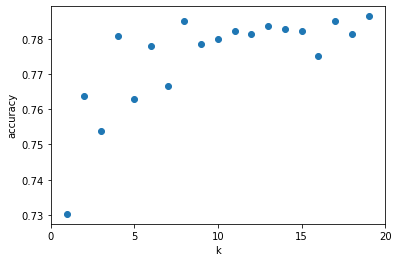

In [32]:
import matplotlib.pyplot as plt
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()